In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [15]:
# Loading all camera data...
xdf0 = pd.read_csv("/home/ubuntu/nitelite/cams31prod.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_UTC']) - pd.Timedelta(hours=4)

xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_EST'])
xdf0.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
1143,2020-10-05 15:04:41,'/home/ubuntu/cams31/collegeTwp/20201005/20201...,collegeTwp,0,2020-10-05 11:04:41
745,2020-10-05 15:04:46,'/home/ubuntu/cams31/CAM02037CCTV43/20201005/2...,CAM02037CCTV43,0,2020-10-05 11:04:46
820,2020-10-05 15:04:48,'/home/ubuntu/cams31/CAM02038CCTV44/20201005/2...,CAM02038CCTV44,0,2020-10-05 11:04:48
883,2020-10-05 15:04:50,'/home/ubuntu/cams31/CAM02039CCTV45/20201005/2...,CAM02039CCTV45,0,2020-10-05 11:04:50
950,2020-10-05 15:04:52,'/home/ubuntu/cams31/CAM02040CCTV46/20201005/2...,CAM02040CCTV46,0,2020-10-05 11:04:52
...,...,...,...,...,...
248790,2020-10-12 14:53:19,'/home/ubuntu/cams31/CAM02046CCTV52/20201012/2...,CAM02046CCTV52,0,2020-10-12 10:53:19
248118,2020-10-12 14:53:21,'/home/ubuntu/cams31/CAM02009CCTV7/20201012/20...,CAM02009CCTV7,0,2020-10-12 10:53:21
247711,2020-10-12 14:53:23,'/home/ubuntu/cams31/CAM02001CCTV2/20201012/20...,CAM02001CCTV2,0,2020-10-12 10:53:23
248184,2020-10-12 14:53:26,'/home/ubuntu/cams31/CAM02010CCTV11/20201012/2...,CAM02010CCTV11,0,2020-10-12 10:53:26


In [16]:
# Loading all camera data...
xdf1 = pd.read_csv("/home/ubuntu/nitelite/cams32prod.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf1['datetime_EST'] = pd.to_datetime(xdf1['datetime_UTC']) - pd.Timedelta(hours=4)

xdf1['datetime_EST'] = pd.to_datetime(xdf1['datetime_EST'])
xdf1.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
139,2020-10-12 14:53:36,'/home/ubuntu/cams32/collegeTwp/20201012/20201...,collegeTwp,0,2020-10-12 10:53:36
71,2020-10-12 14:53:39,'/home/ubuntu/cams32/CAM02028CCTV32/20201012/2...,CAM02028CCTV32,0,2020-10-12 10:53:39
85,2020-10-12 14:53:41,'/home/ubuntu/cams32/CAM02037CCTV43/20201012/2...,CAM02037CCTV43,0,2020-10-12 10:53:41
94,2020-10-12 14:53:43,'/home/ubuntu/cams32/CAM02038CCTV44/20201012/2...,CAM02038CCTV44,0,2020-10-12 10:53:43
103,2020-10-12 14:53:45,'/home/ubuntu/cams32/CAM02039CCTV45/20201012/2...,CAM02039CCTV45,0,2020-10-12 10:53:45
...,...,...,...,...,...
246186,2020-10-19 14:59:58,'/home/ubuntu/cams32/parkArboretum/20201019/20...,parkArboretum,0,2020-10-19 10:59:58
246189,2020-10-19 15:00:00,'/home/ubuntu/cams32/CAM02020CCTV24/20201019/2...,CAM02020CCTV24,0,2020-10-19 11:00:00
246187,2020-10-19 15:00:02,'/home/ubuntu/cams32/CAM02002CCTV3/20201019/20...,CAM02002CCTV3,0,2020-10-19 11:00:02
246188,2020-10-19 15:00:04,'/home/ubuntu/cams32/CAM02007CCTV13/20201019/2...,CAM02007CCTV13,0,2020-10-19 11:00:04


In [35]:
# Loading all camera data...
xdf7 = pd.read_csv("/home/ubuntu/nitelite/full_pedestrians_427-105.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_UTC']) - pd.Timedelta(hours=4)

xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_EST'])
xdf7.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
4315421,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp....,collegeTwp,0,2020-04-24 16:41:29
4314124,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
4314430,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
4314619,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
4314777,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
1912449,2020-10-05 15:04:24,'/home/ubuntu/cams30/CAM02005CCTV9/20201005/20...,CAM02005CCTV9,0,2020-10-05 11:04:24
1912455,2020-10-05 15:04:26,'/home/ubuntu/cams30/CAM02006CCTV10/20201005/2...,CAM02006CCTV10,0,2020-10-05 11:04:26
1912495,2020-10-05 15:04:28,'/home/ubuntu/cams30/CAM02033CCTV38/20201005/2...,CAM02033CCTV38,0,2020-10-05 11:04:28
1912533,2020-10-05 15:04:30,'/home/ubuntu/cams30/collegeTwp/20201005/20201...,collegeTwp,0,2020-10-05 11:04:30


In [36]:
xdf = pd.concat([xdf0,xdf1,xdf7])

In [37]:
xdf.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
4315421,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp....,collegeTwp,0,2020-04-24 16:41:29
4314124,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
4314430,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
4314619,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
4314777,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
246186,2020-10-19 14:59:58,'/home/ubuntu/cams32/parkArboretum/20201019/20...,parkArboretum,0,2020-10-19 10:59:58
246189,2020-10-19 15:00:00,'/home/ubuntu/cams32/CAM02020CCTV24/20201019/2...,CAM02020CCTV24,0,2020-10-19 11:00:00
246187,2020-10-19 15:00:02,'/home/ubuntu/cams32/CAM02002CCTV3/20201019/20...,CAM02002CCTV3,0,2020-10-19 11:00:02
246188,2020-10-19 15:00:04,'/home/ubuntu/cams32/CAM02007CCTV13/20201019/2...,CAM02007CCTV13,0,2020-10-19 11:00:04


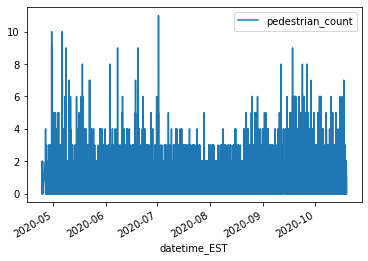

In [38]:
xdf.plot(x="datetime_EST",y='pedestrian_count')

In [39]:
xdf.to_csv(f"full_pedestrians_427-1019.csv",index=False)

In [40]:

bennerpikeimages = xdf[ xdf['camera_name'] == 'CAM02020CCTV24' ].index 
  
# drop these row indexes 
# from dataFrame 

#xdf = xdf.drop(bennerpikeimages, inplace = True) 
xdfb = xdf.drop(xdf[ xdf['camera_name'] == 'CAM02020CCTV24' ].index ) 

In [41]:
xdf

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
0,2020-10-05 15:05:11,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:05:11
1,2020-10-05 15:05:52,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:05:52
2,2020-10-05 15:06:33,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:06:33
3,2020-10-05 15:07:13,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:07:13
4,2020-10-05 15:07:55,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:07:55
...,...,...,...,...,...
5631501,2020-06-15 14:00:31,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:00:31
5631502,2020-06-15 14:01:11,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:01:11
5631503,2020-06-15 14:01:52,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:01:52
5631504,2020-06-15 14:03:37,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:03:37


In [42]:
xdfb

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
0,2020-10-05 15:05:11,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:05:11
1,2020-10-05 15:05:52,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:05:52
2,2020-10-05 15:06:33,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:06:33
3,2020-10-05 15:07:13,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:07:13
4,2020-10-05 15:07:55,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:07:55
...,...,...,...,...,...
5631501,2020-06-15 14:00:31,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:00:31
5631502,2020-06-15 14:01:11,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:01:11
5631503,2020-06-15 14:01:52,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:01:52
5631504,2020-06-15 14:03:37,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:03:37


In [43]:
icdf = xdfb.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfb.camera_name]).size().reset_index(name='image_count')

In [44]:
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_count_sum')

In [45]:
icdfcvc = xdfb.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfb.camera_name])['pedestrian_count'].sum().reset_index(name='pedestrian_count_sum')

In [46]:
icdfcvc

,datetime_EST,camera_name,pedestrian_count_sum
0,2020-04-24 16:00:00,CAM02001CCTV2,0
1,2020-04-24 16:00:00,CAM02002CCTV3,0
2,2020-04-24 16:00:00,CAM02003CCTV4,0
3,2020-04-24 16:00:00,CAM02005CCTV9,0
4,2020-04-24 16:00:00,CAM02006CCTV10,0
...,...,...,...
74752,2020-10-19 10:00:00,collegeTwp,1
74753,2020-10-19 10:00:00,parkArboretum,2
74754,2020-10-19 11:00:00,CAM02002CCTV3,0
74755,2020-10-19 11:00:00,CAM02007CCTV13,0


In [47]:
icdfcvc['image_count'] = icdf["image_count"]

In [48]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.pedestrian_count_sum) / (float(row.image_count)/60.0))
    return(rv)   

In [49]:
icdfcvc['pedestrian_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

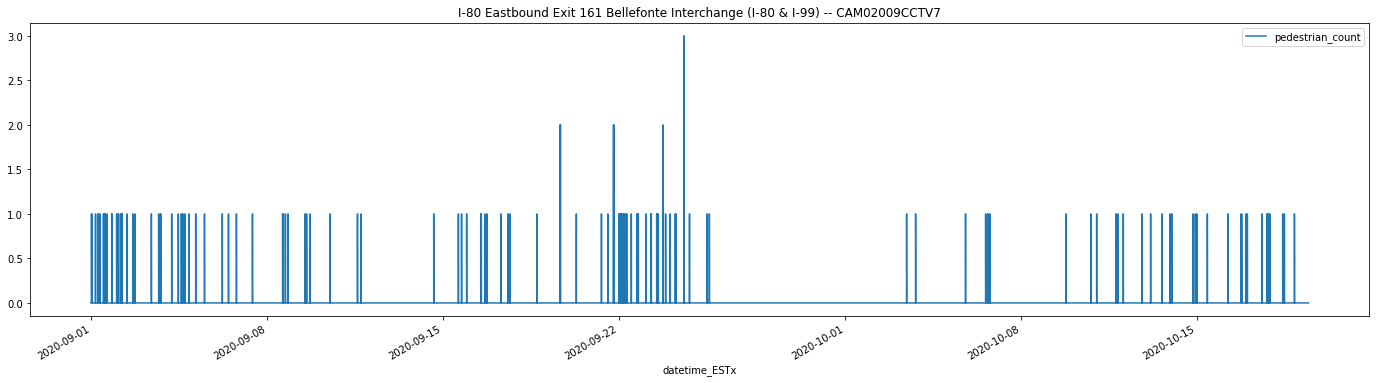

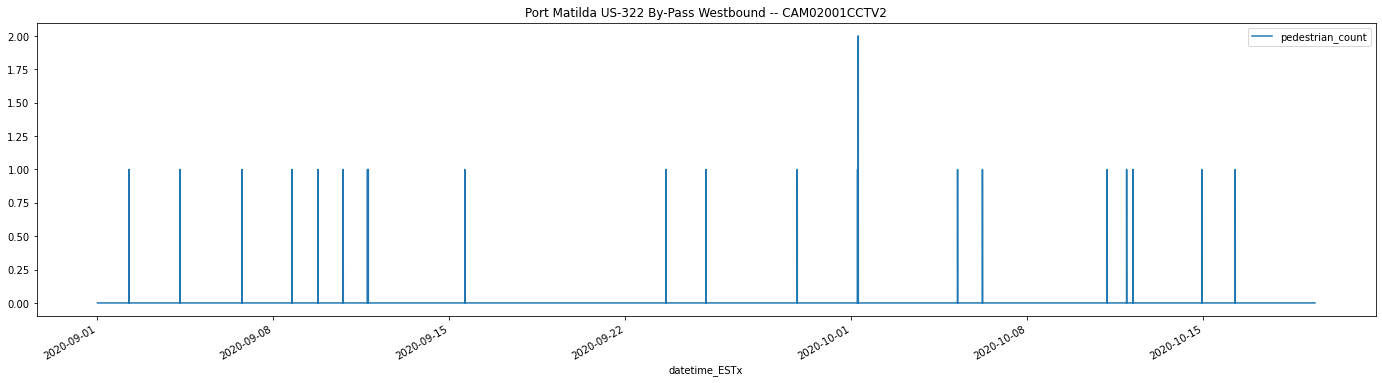

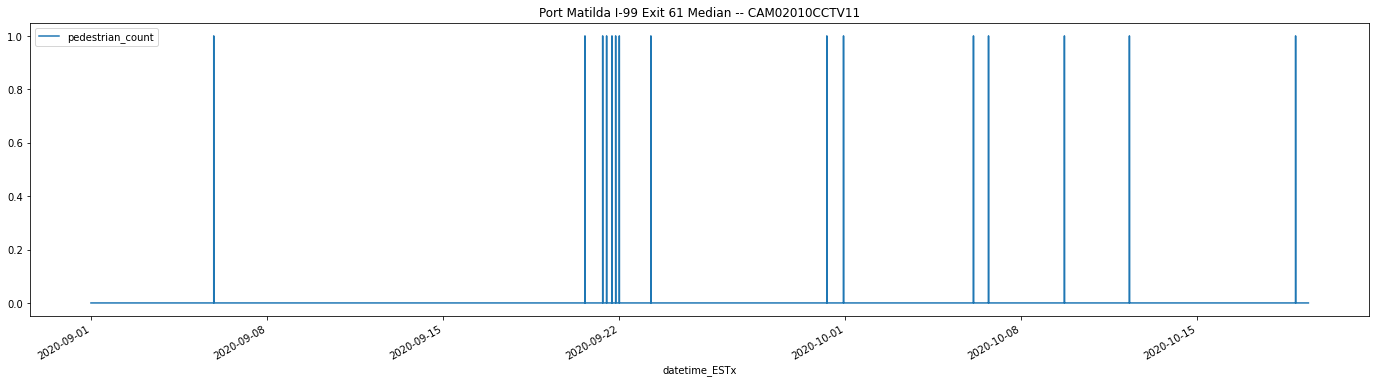

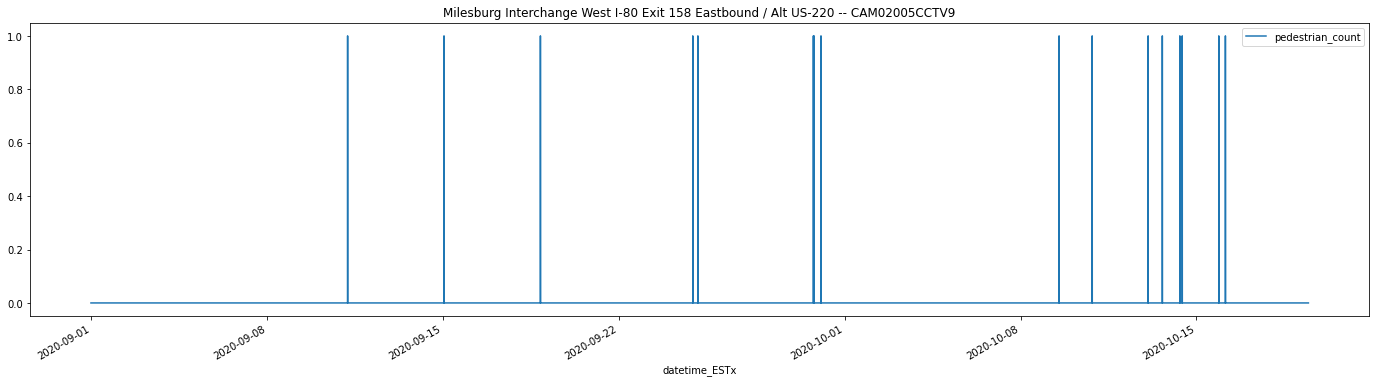

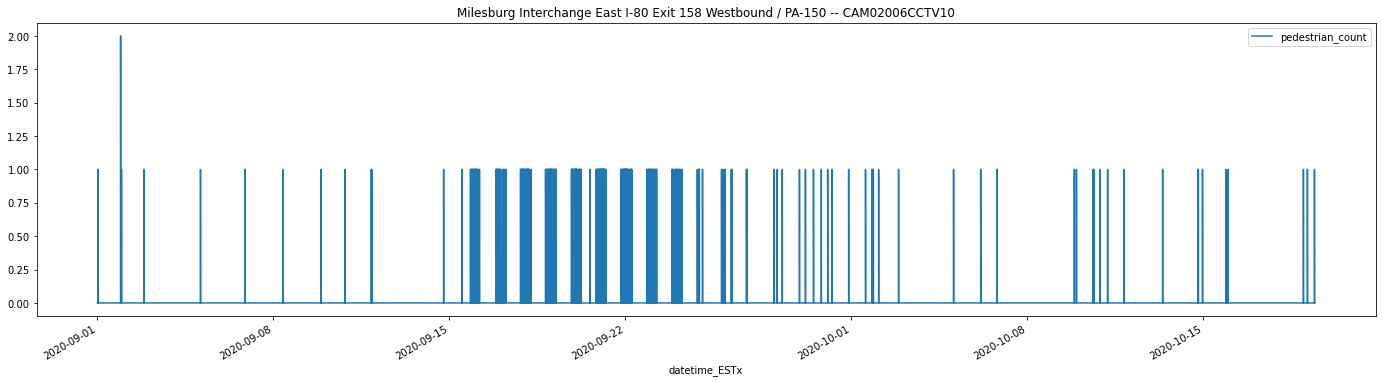

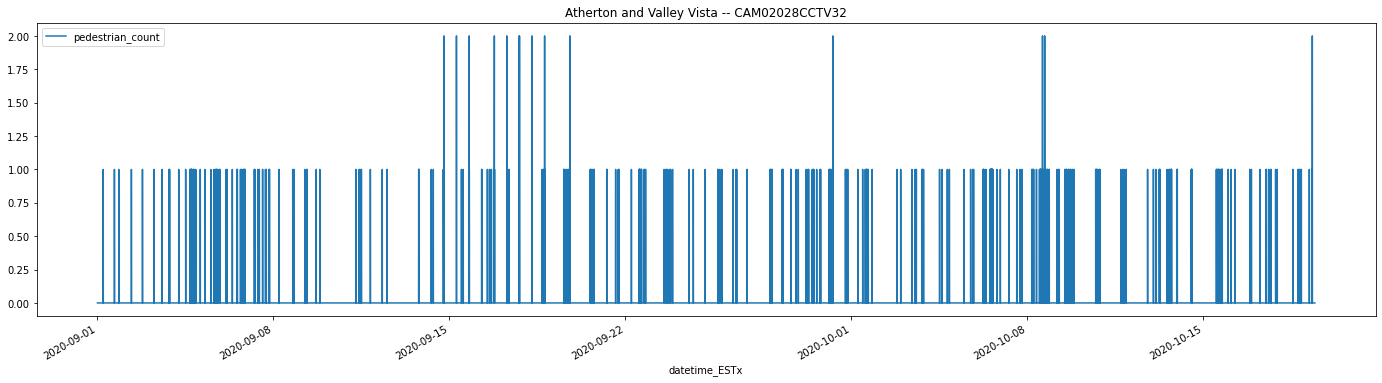

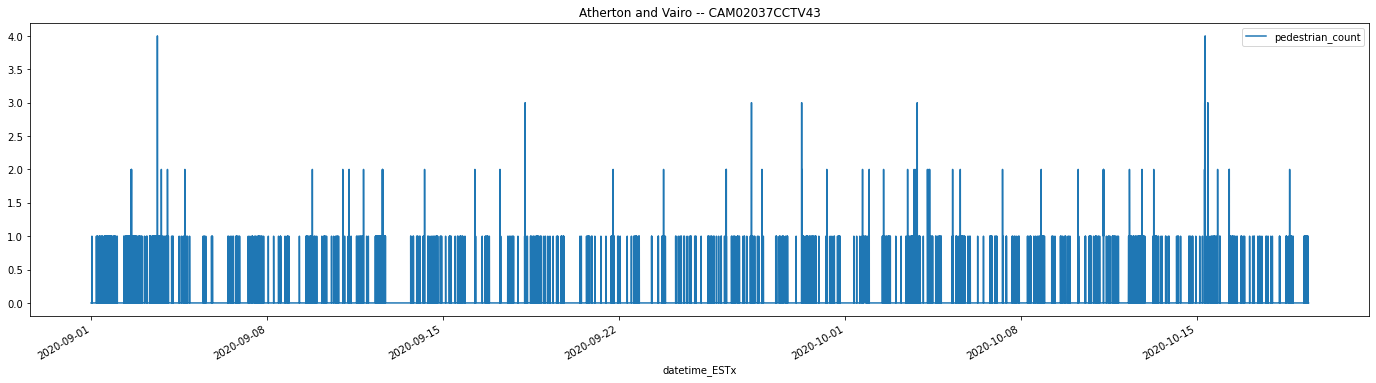

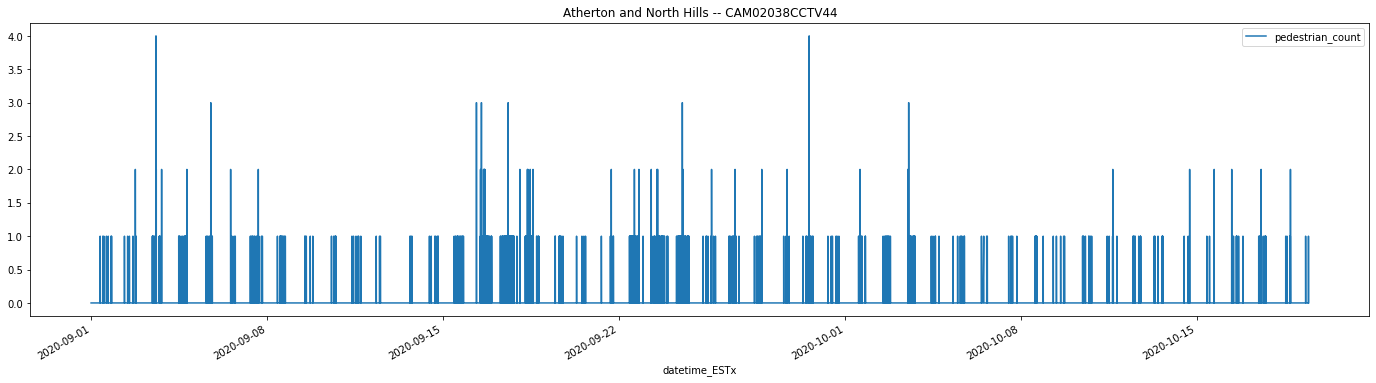

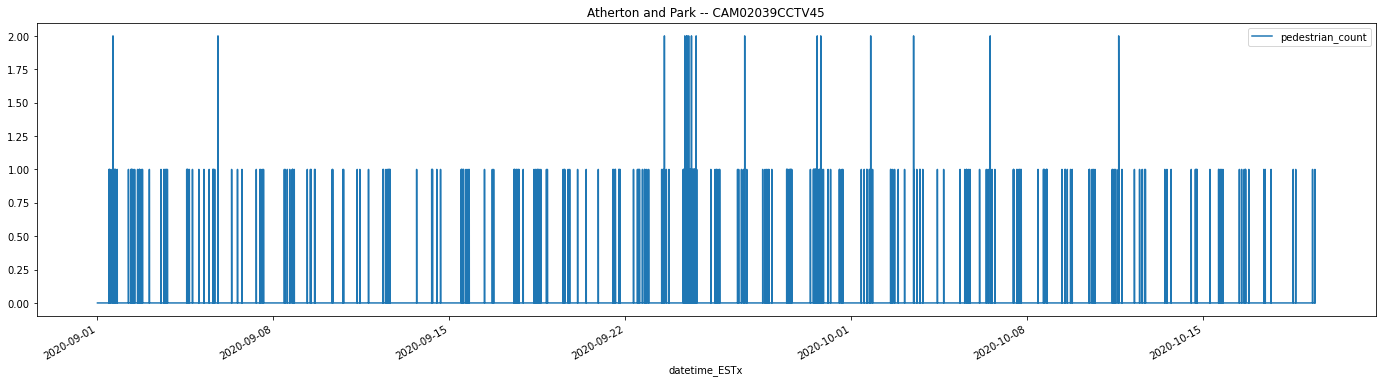

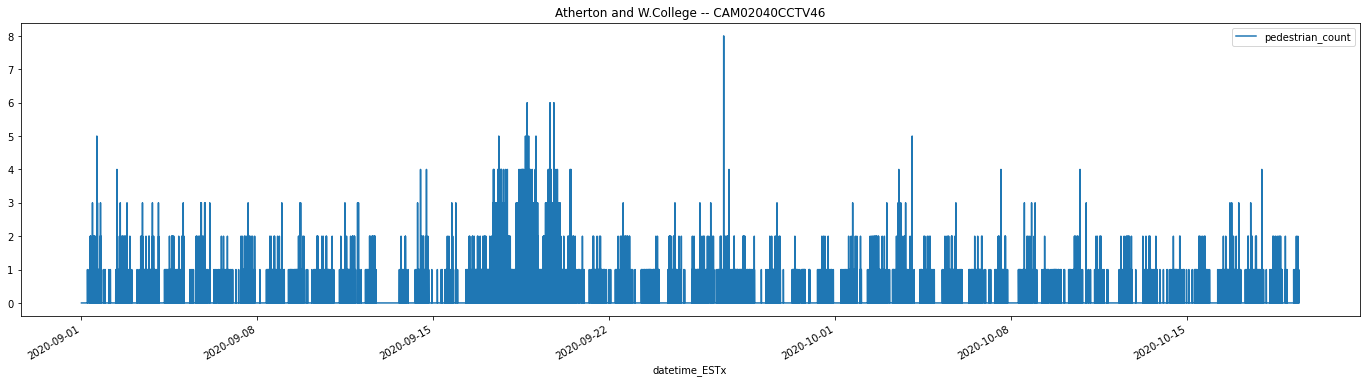

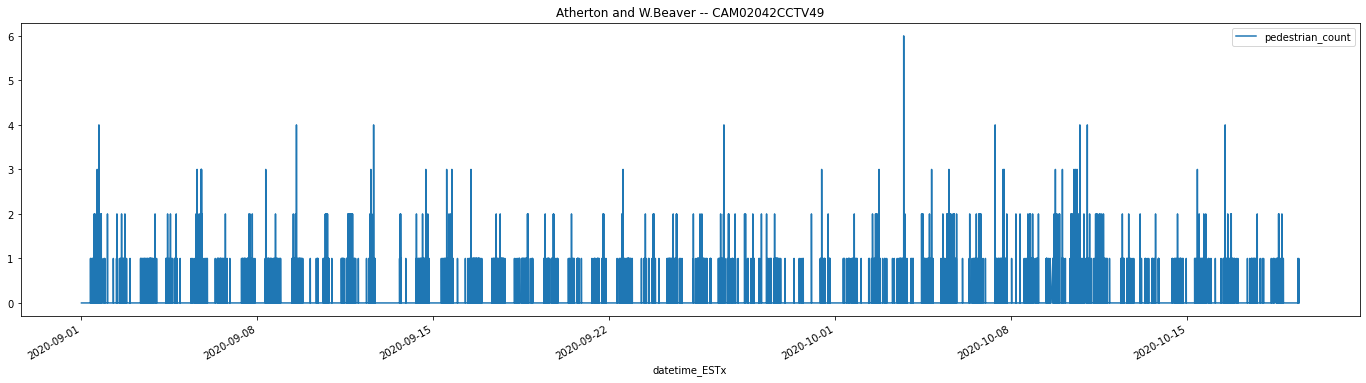

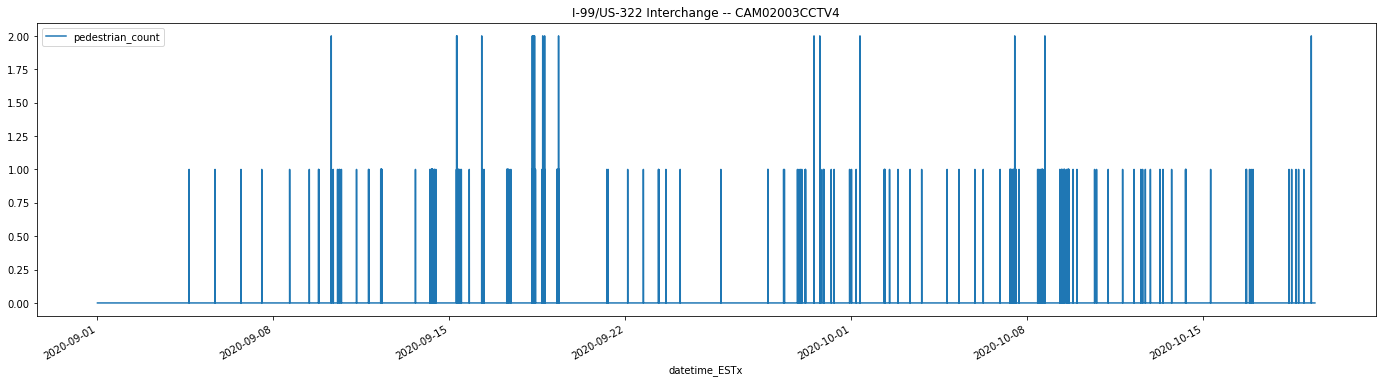

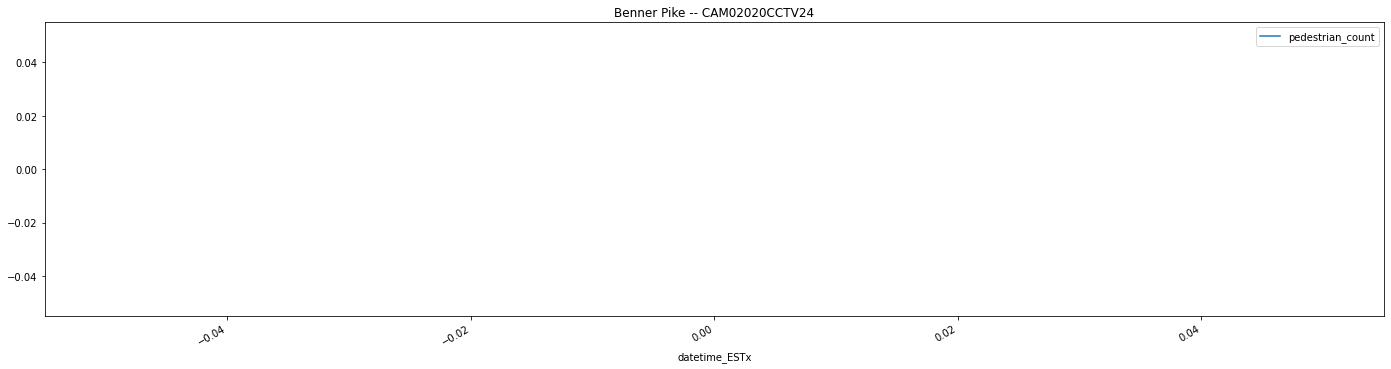

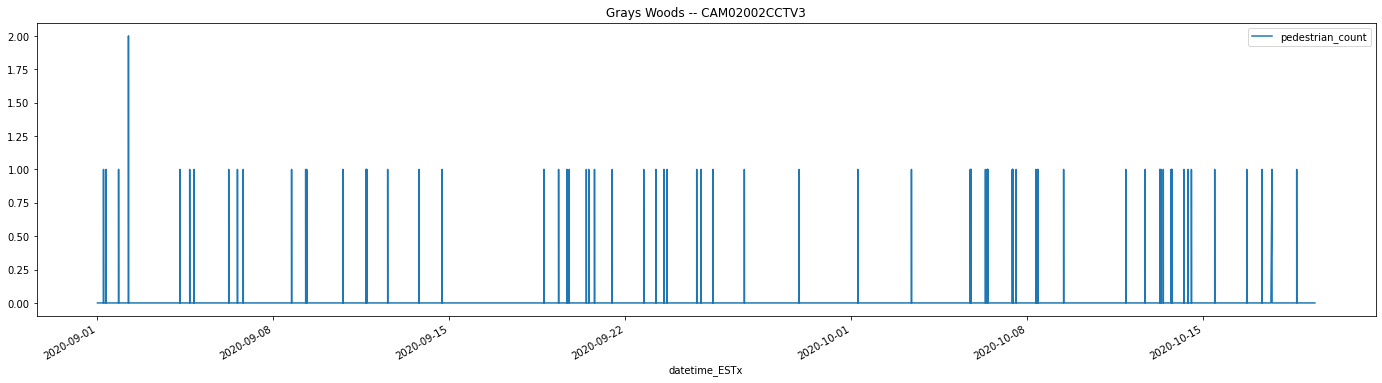

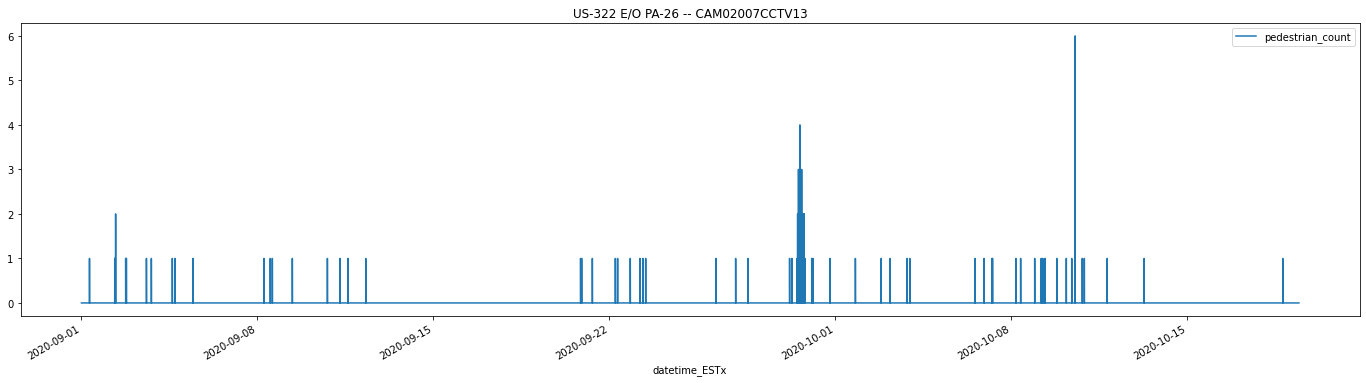

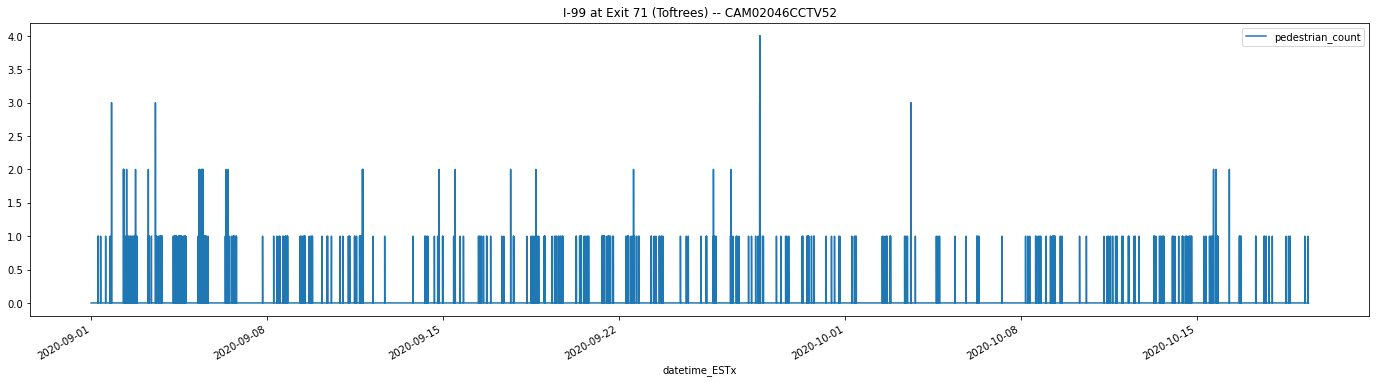

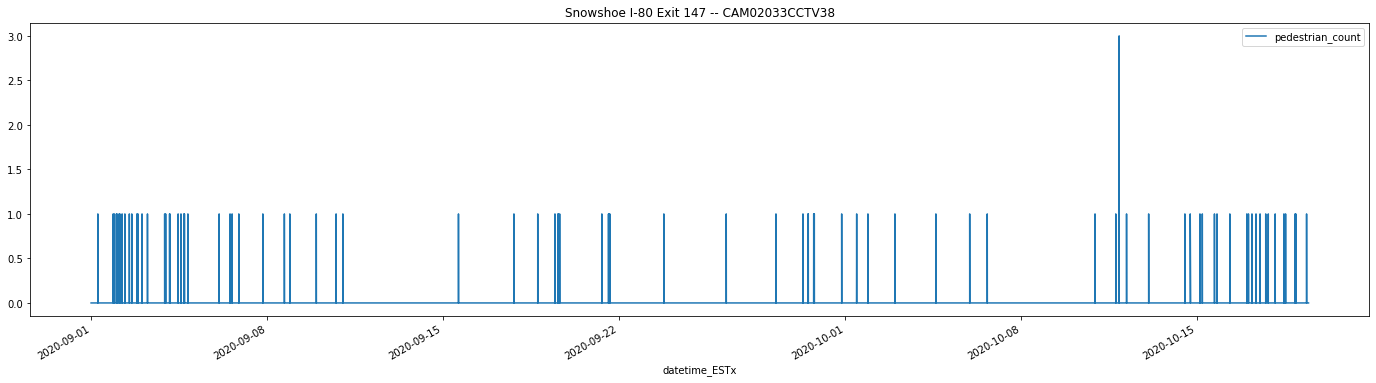

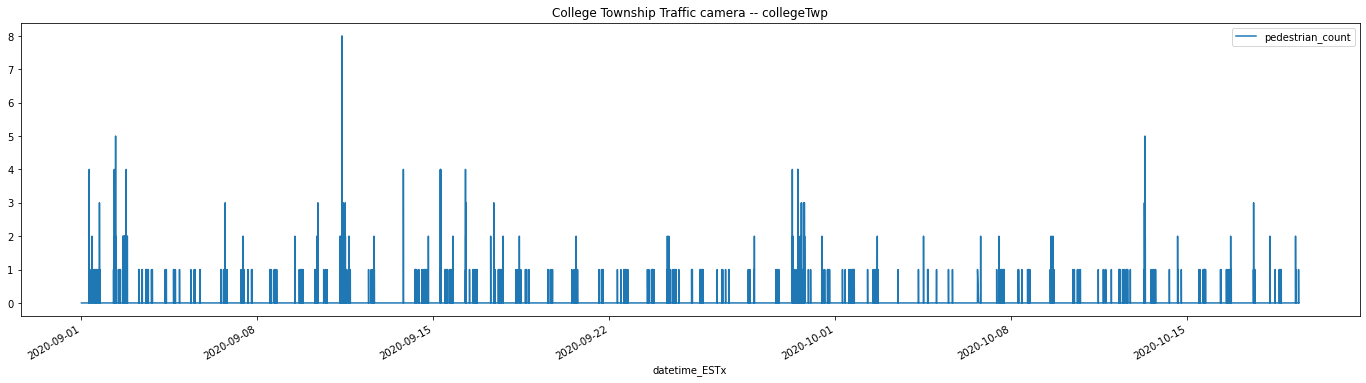

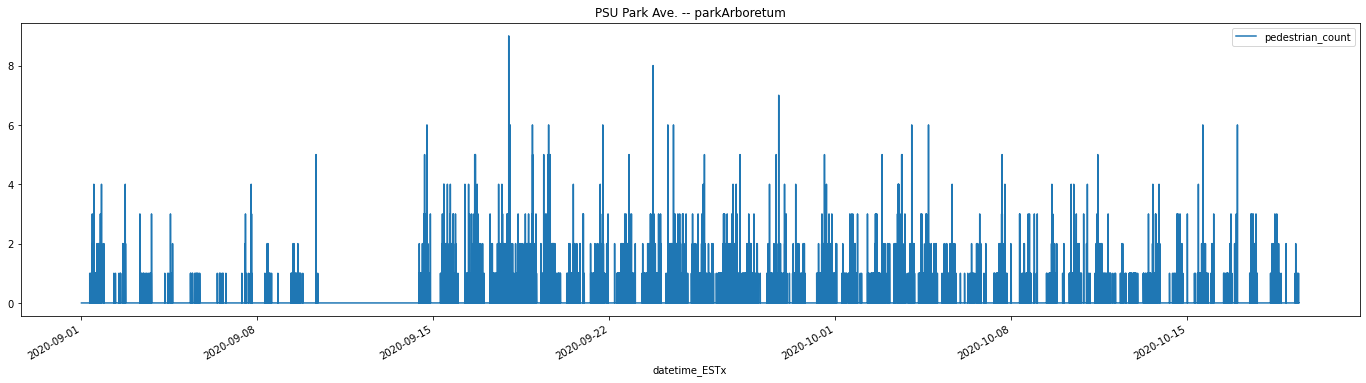

In [50]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = xdfb[xdfb['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_ESTx'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_ESTx')
    fromjul = fdf_twp[fdf_twp['datetime_ESTx'] > '2020-9-1 00:00:00']
    ax = fromjul.plot(x ='datetime_ESTx', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

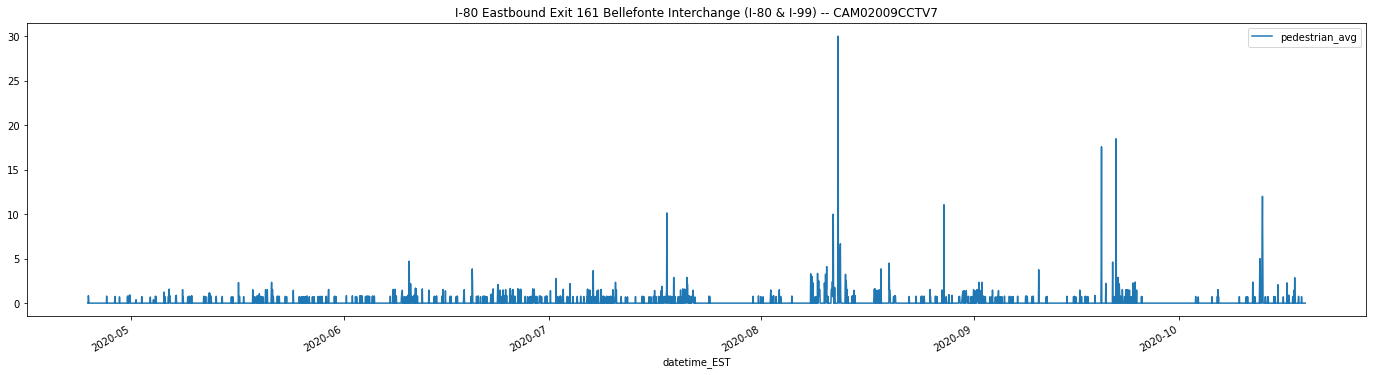

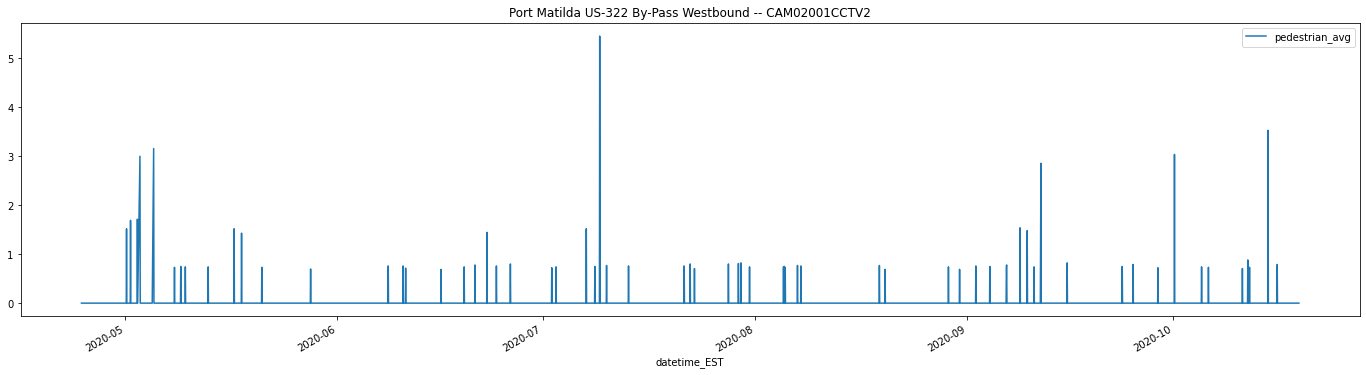

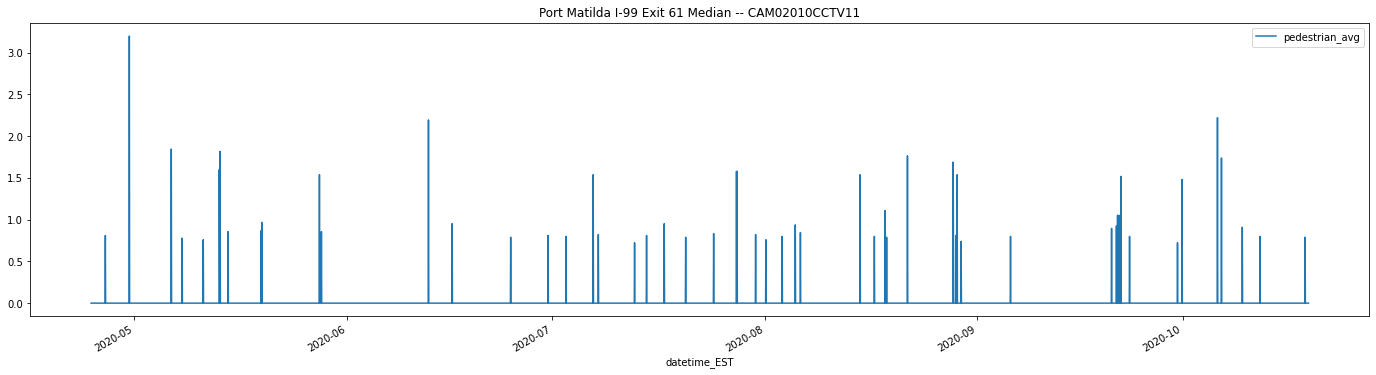

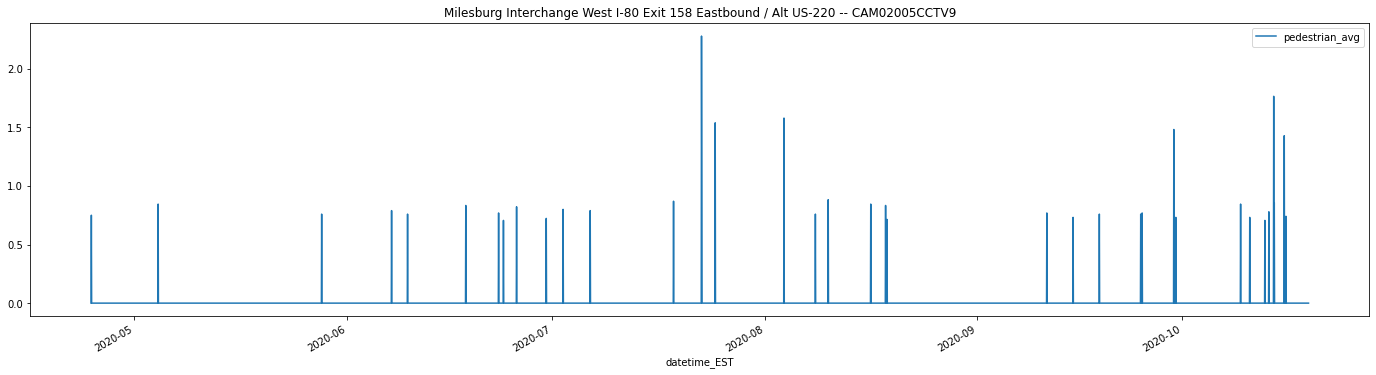

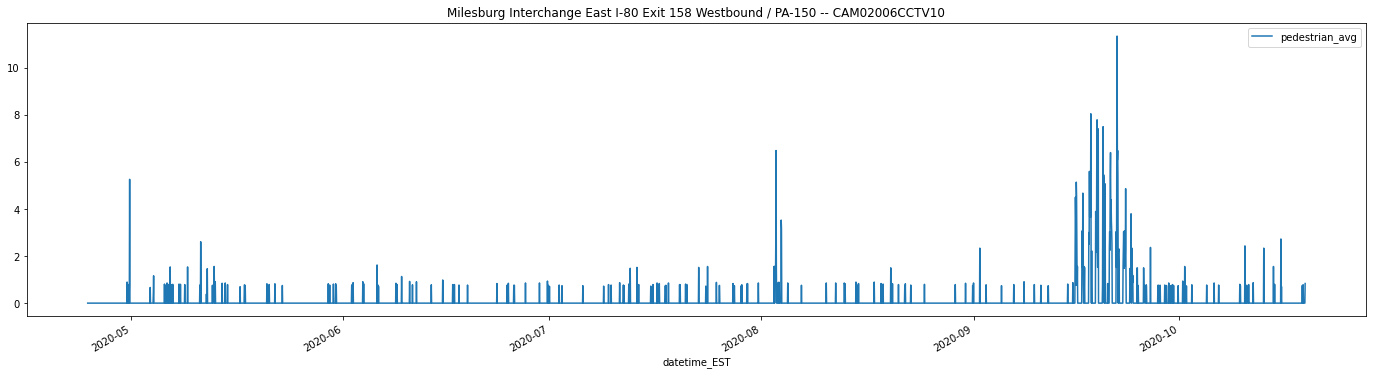

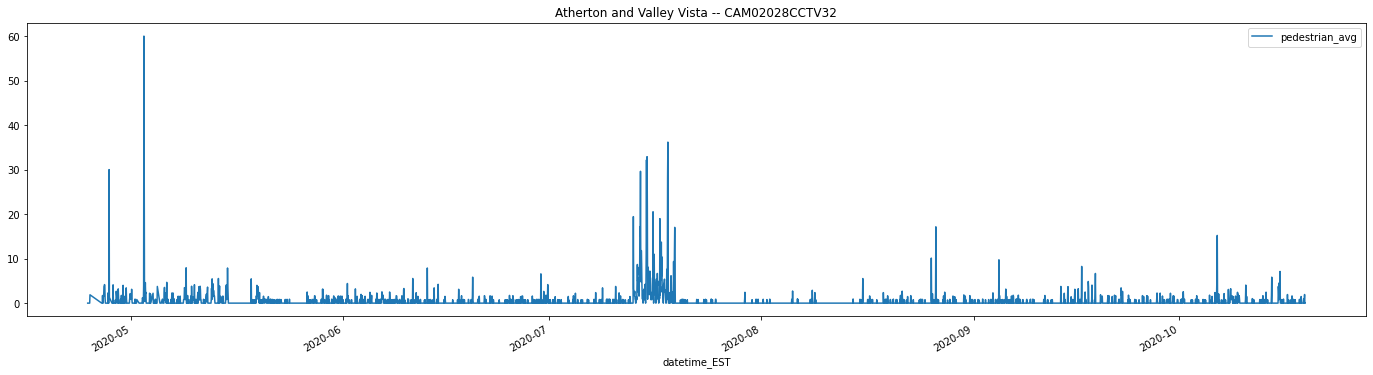

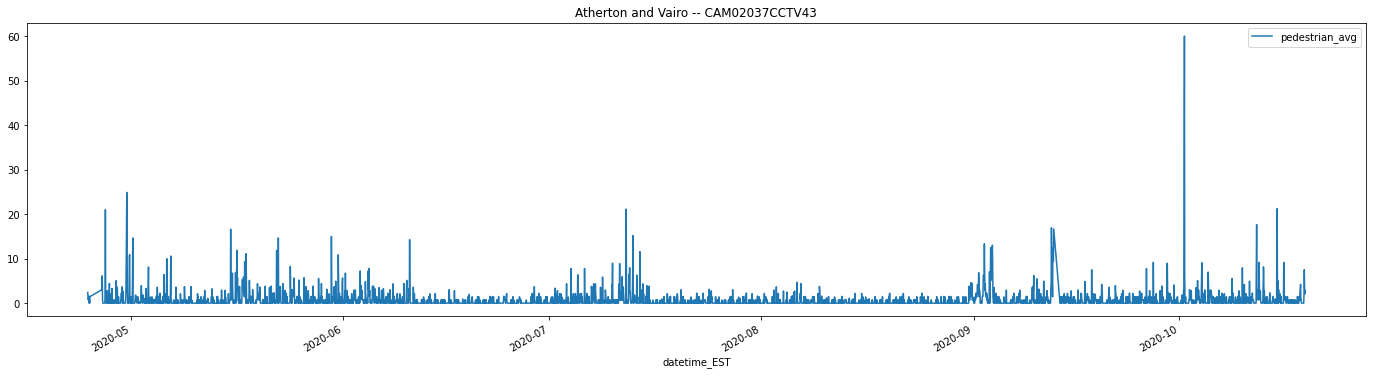

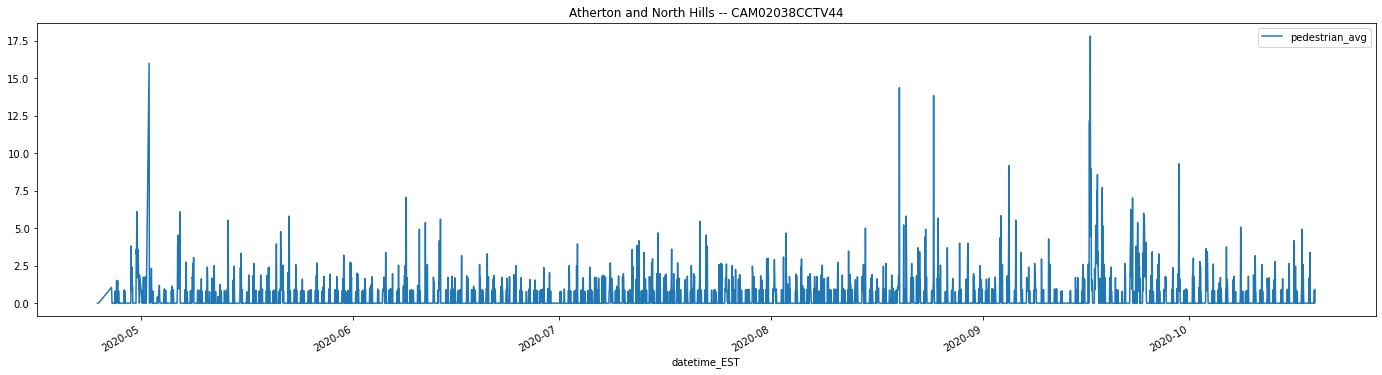

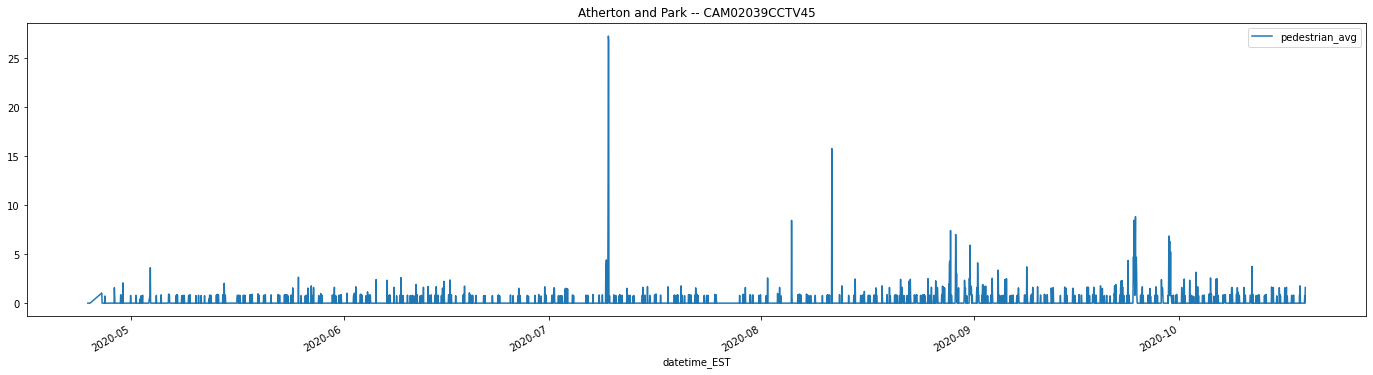

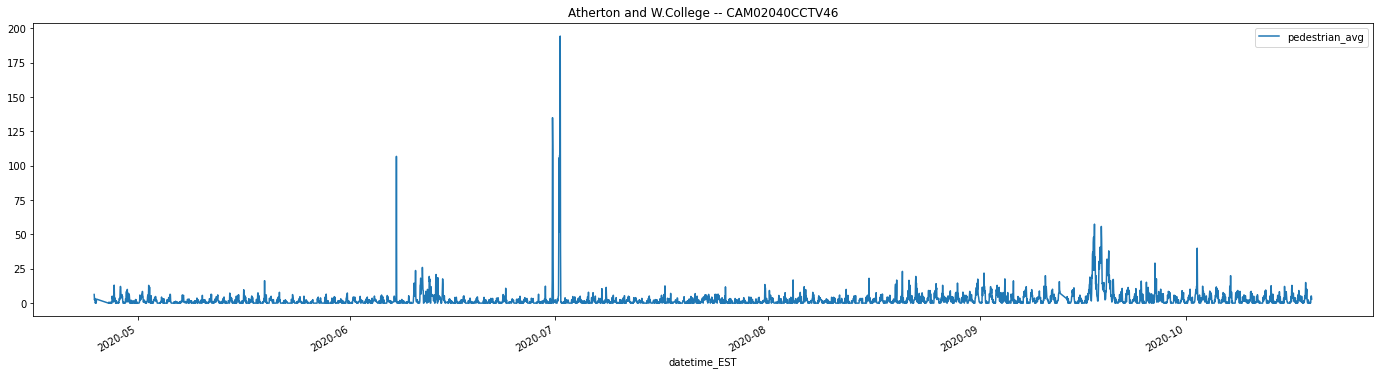

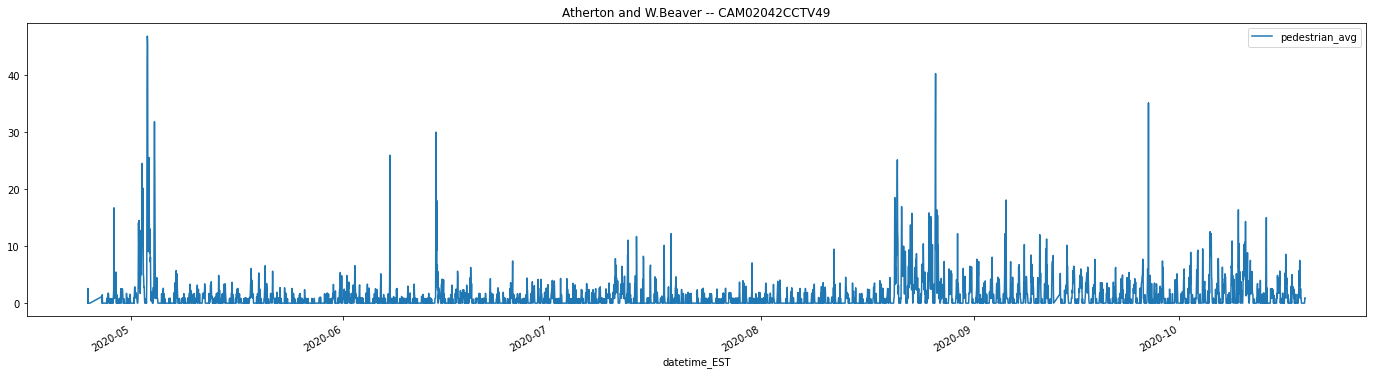

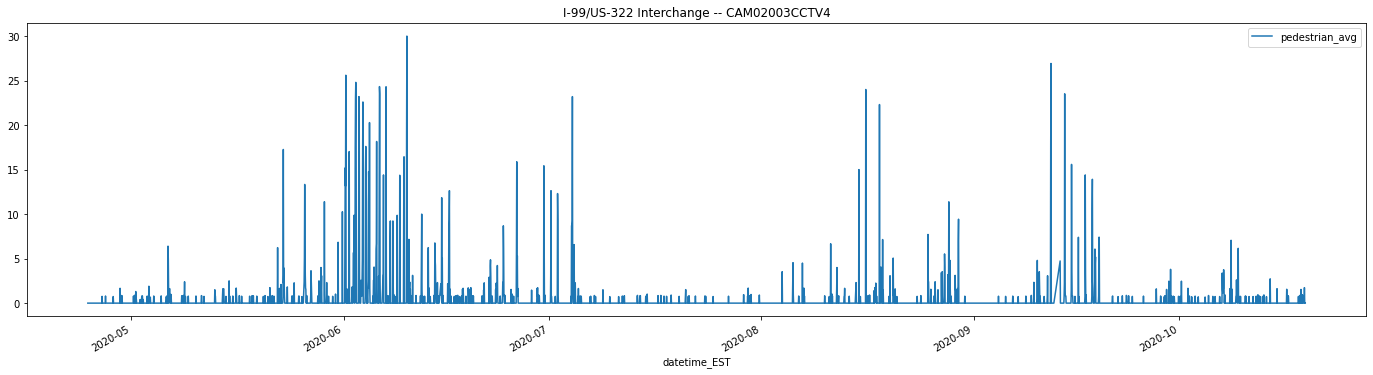

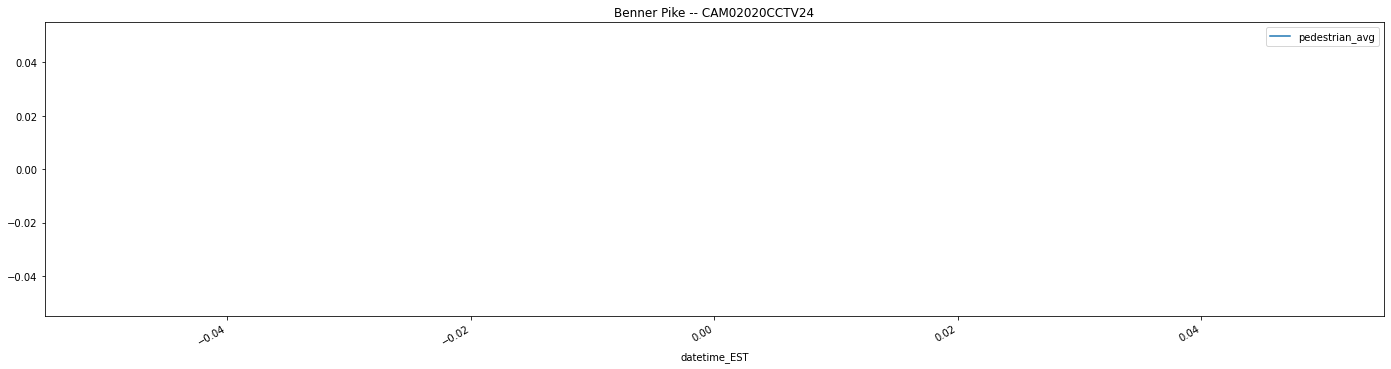

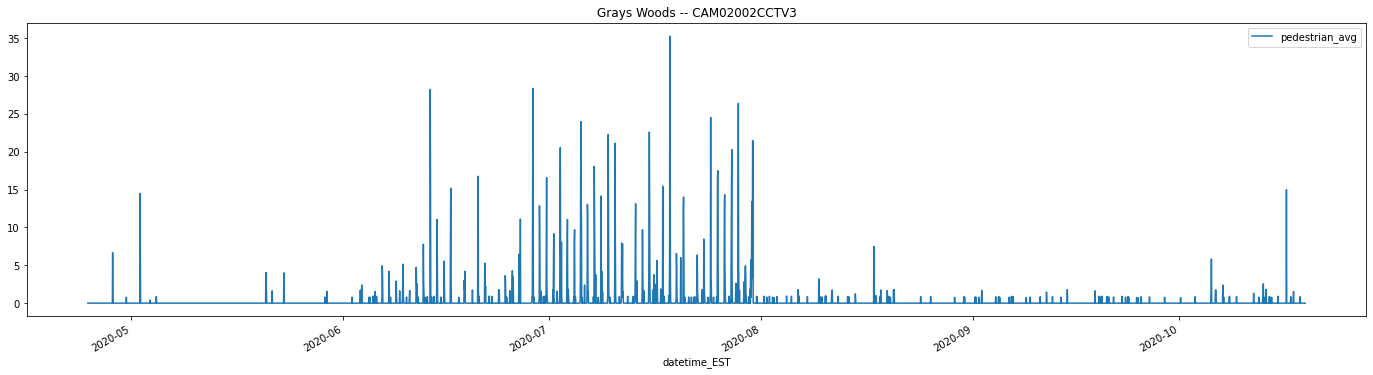

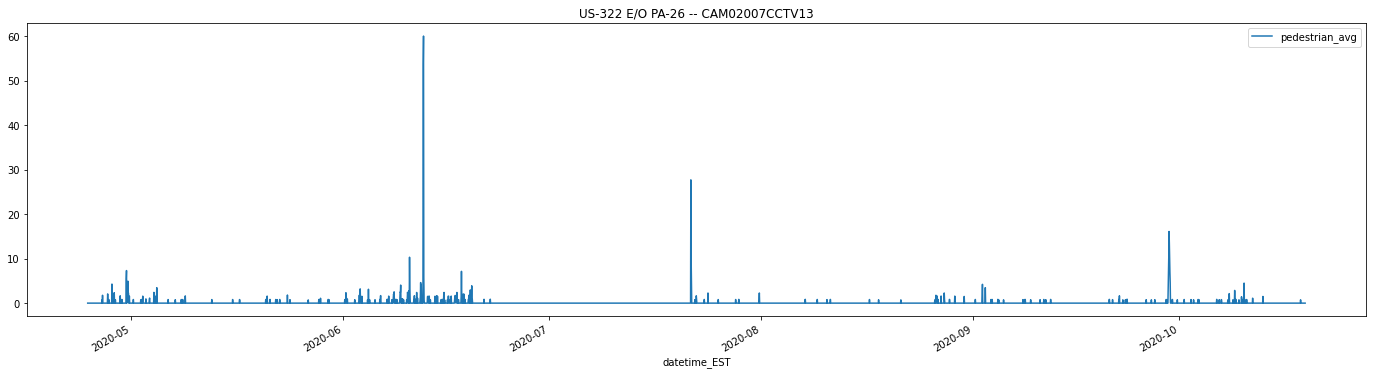

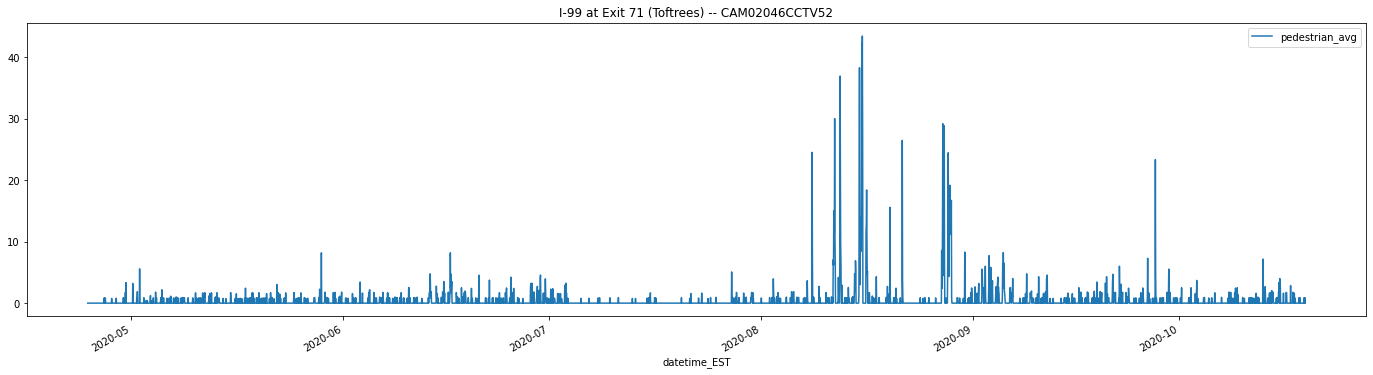

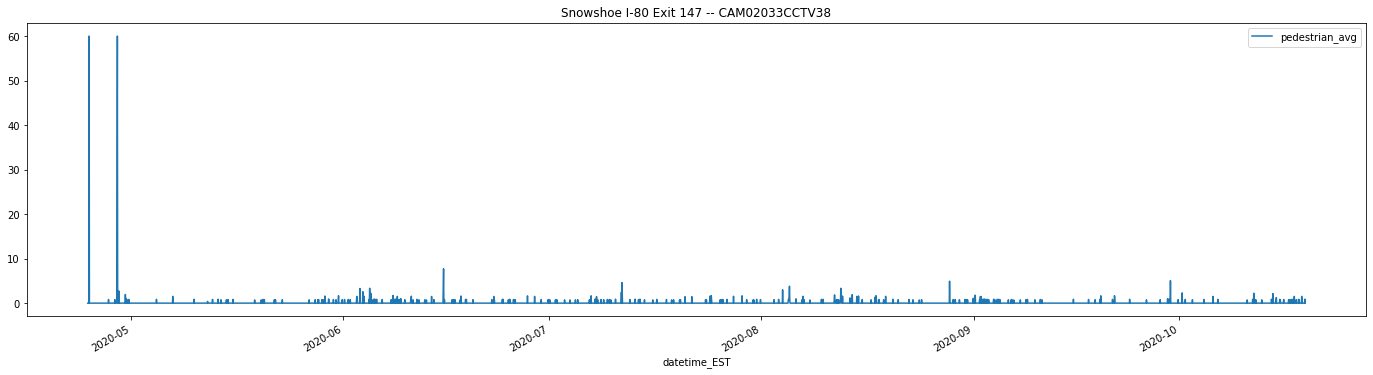

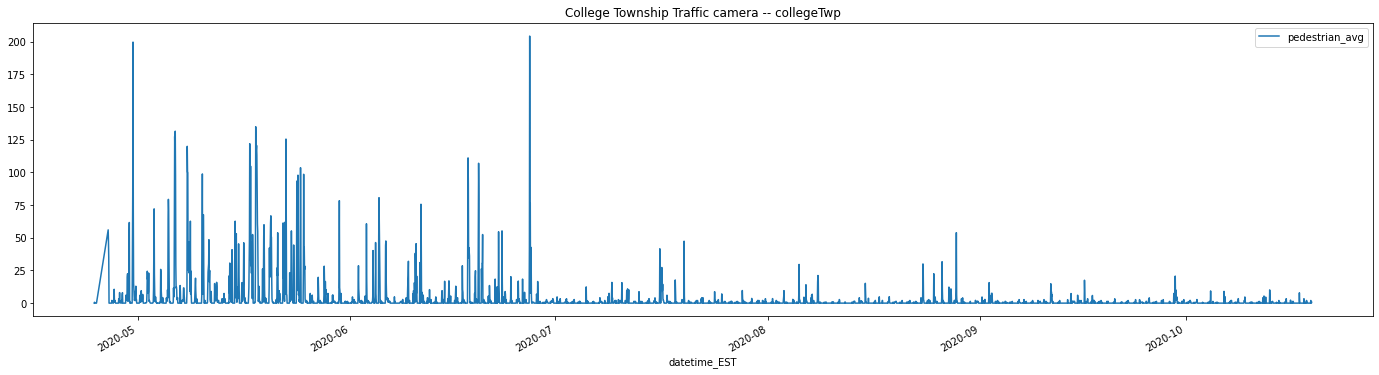

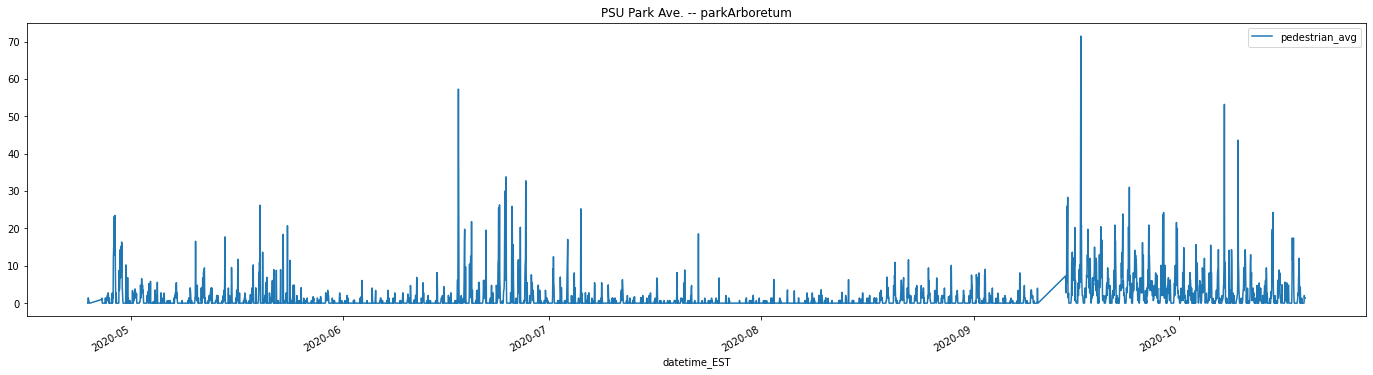

In [51]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [52]:
icdfcvc.to_csv("pedestrian_avg_per_hour_each_camera_427-1019.csv",index=False)

In [75]:
icdfcvc

,datetime_EST,camera_name,pedestrian_count_sum,image_count,pedestrian_avg
0,2020-04-24 16:00:00,CAM02001CCTV2,0,25,0.000000
1,2020-04-24 16:00:00,CAM02002CCTV3,0,22,0.000000
2,2020-04-24 16:00:00,CAM02003CCTV4,0,23,0.000000
3,2020-04-24 16:00:00,CAM02005CCTV9,0,25,0.000000
4,2020-04-24 16:00:00,CAM02006CCTV10,0,26,0.000000
...,...,...,...,...,...
74752,2020-10-19 10:00:00,collegeTwp,1,89,0.674157
74753,2020-10-19 10:00:00,parkArboretum,2,89,1.348315
74754,2020-10-19 11:00:00,CAM02002CCTV3,0,1,0.000000
74755,2020-10-19 11:00:00,CAM02007CCTV13,0,1,0.000000


In [53]:
xdf

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
0,2020-10-05 15:05:11,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:05:11
1,2020-10-05 15:05:52,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:05:52
2,2020-10-05 15:06:33,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:06:33
3,2020-10-05 15:07:13,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:07:13
4,2020-10-05 15:07:55,'/home/ubuntu/cams31/CAM02001CCTV2/20201005/20...,CAM02001CCTV2,0,2020-10-05 11:07:55
...,...,...,...,...,...
5631501,2020-06-15 14:00:31,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:00:31
5631502,2020-06-15 14:01:11,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:01:11
5631503,2020-06-15 14:01:52,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:01:52
5631504,2020-06-15 14:03:37,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum,0,2020-06-15 10:03:37


In [54]:
xdfb.set_index('datetime_EST', drop=False, inplace=True)
df_sampledhb = xdfb.set_index('datetime_EST').resample('H').sum().reset_index()

In [55]:
icdfs

,datetime_EST,image_count_sum
0,2020-04-24 16:00:00,420
1,2020-04-24 17:00:00,1361
2,2020-04-24 18:00:00,1278
3,2020-04-24 20:00:00,1059
4,2020-04-24 21:00:00,609
...,...,...
4201,2020-10-19 07:00:00,1159
4202,2020-10-19 08:00:00,1109
4203,2020-10-19 09:00:00,1224
4204,2020-10-19 10:00:00,1246


In [56]:
df_sampledhb

,datetime_EST,pedestrian_count
0,2020-04-24 16:00:00,3
1,2020-04-24 17:00:00,11
2,2020-04-24 18:00:00,8
3,2020-04-24 19:00:00,0
4,2020-04-24 20:00:00,3
...,...,...
4263,2020-10-19 07:00:00,22
4264,2020-10-19 08:00:00,17
4265,2020-10-19 09:00:00,12
4266,2020-10-19 10:00:00,16


In [57]:
icdfs.columns

Index(['datetime_EST', 'image_count_sum'], dtype='object')

In [74]:
icdfs

,datetime_EST,image_count_sum
0,2020-04-24 16:00:00,420
1,2020-04-24 17:00:00,1361
2,2020-04-24 18:00:00,1278
3,2020-04-24 20:00:00,1059
4,2020-04-24 21:00:00,609
...,...,...
4201,2020-10-19 07:00:00,1159
4202,2020-10-19 08:00:00,1109
4203,2020-10-19 09:00:00,1224
4204,2020-10-19 10:00:00,1246


In [58]:
mergedb = df_sampledhb.merge(icdfs, on='datetime_EST')

In [65]:
#merged

In [66]:
mergedb

,datetime_EST,pedestrian_count,image_count_sum
0,2020-04-24 16:00:00,3,420
1,2020-04-24 17:00:00,11,1361
2,2020-04-24 18:00:00,8,1278
3,2020-04-24 20:00:00,3,1059
4,2020-04-24 21:00:00,2,609
...,...,...,...
4201,2020-10-19 07:00:00,22,1159
4202,2020-10-19 08:00:00,17,1109
4203,2020-10-19 09:00:00,12,1224
4204,2020-10-19 10:00:00,16,1246


In [67]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_count_sum > 0:
        rv = (float(row.pedestrian_count) / (float(row.image_count_sum)/(18.0 * 60.0)))  # 18 cameras w/o Benner Pike
    return rv   

df_sampledhb['pedestrian_avg'] = mergedb.apply(get_vc_avg, axis=1)
mergedb['pedestrian_avg'] = mergedb.apply(get_vc_avg, axis=1)

In [68]:
mergedb

,datetime_EST,pedestrian_count,image_count_sum,pedestrian_avg
0,2020-04-24 16:00:00,3,420,7.714286
1,2020-04-24 17:00:00,11,1361,8.728876
2,2020-04-24 18:00:00,8,1278,6.760563
3,2020-04-24 20:00:00,3,1059,3.059490
4,2020-04-24 21:00:00,2,609,3.546798
...,...,...,...,...
4201,2020-10-19 07:00:00,22,1159,20.500431
4202,2020-10-19 08:00:00,17,1109,16.555455
4203,2020-10-19 09:00:00,12,1224,10.588235
4204,2020-10-19 10:00:00,16,1246,13.868379


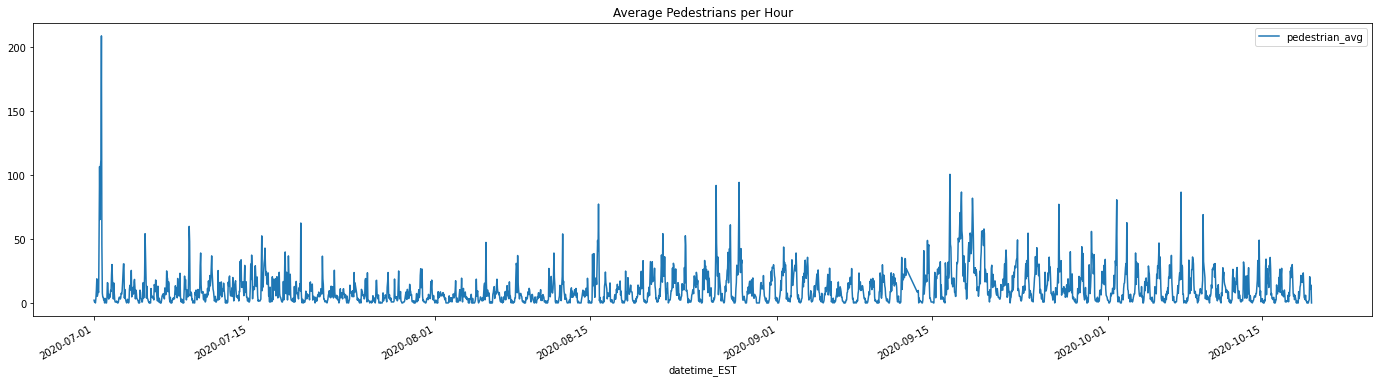

In [69]:
fromjul = mergedb[mergedb['datetime_EST'] > '2020-7-1 00:00:00']
ax = fromjul.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"Average Pedestrians per Hour")

In [234]:
#mergedb.to_csv("pedestrian_avg_per_hour_all_cameras_427-105.csv",index=False)

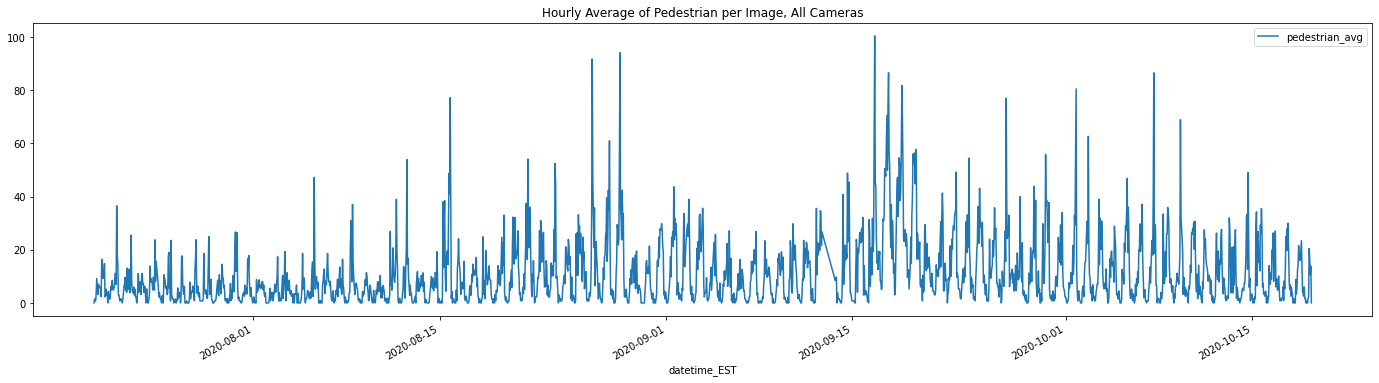

In [70]:
sds = mergedb[(mergedb['datetime_EST'] > '2020-07-20 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Pedestrian per Image, All Cameras")


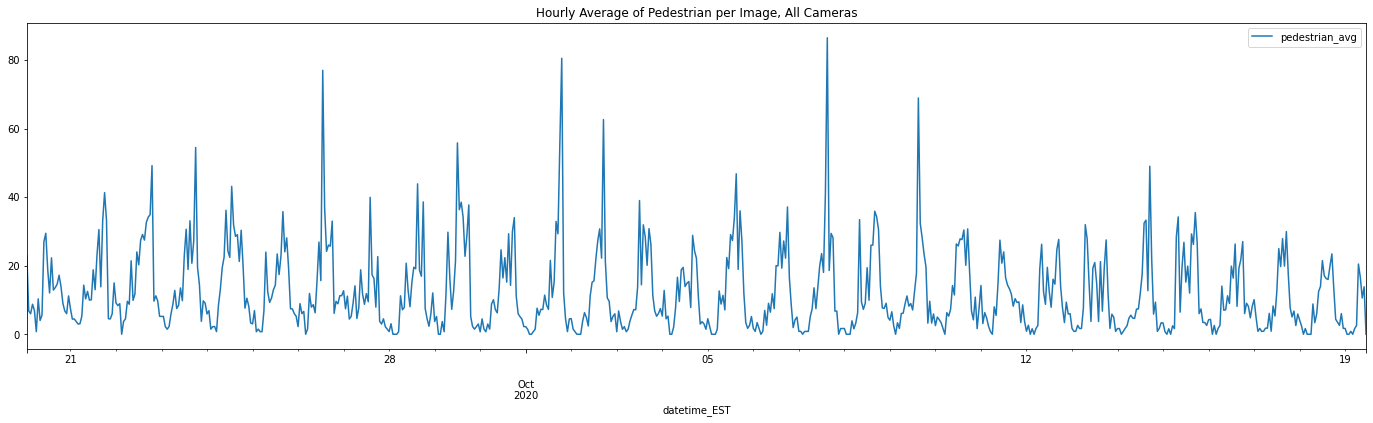

In [71]:
sds = mergedb[(mergedb['datetime_EST'] > '2020-9-20 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Pedestrian per Image, All Cameras")
